# Neural Networks performance for generating standard random distributions

In [56]:
import numpy as np
import random
import math
import torch
import time
import matplotlib.pyplot as plt

# Avec Numpy 

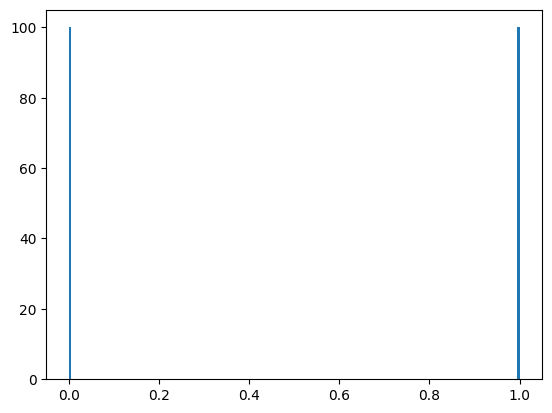

Le temps d'execution avec NUMPY d'une loi BERNOULLI pour 1000000 itérations est de 3.070582866668701 secondes


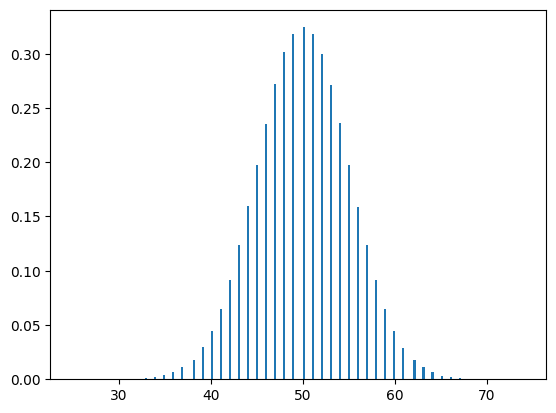

Le temps d'execution avec NUMPY d'une loi BINOMIALE pour 1000000 itérations est de 4.0084381103515625 secondes


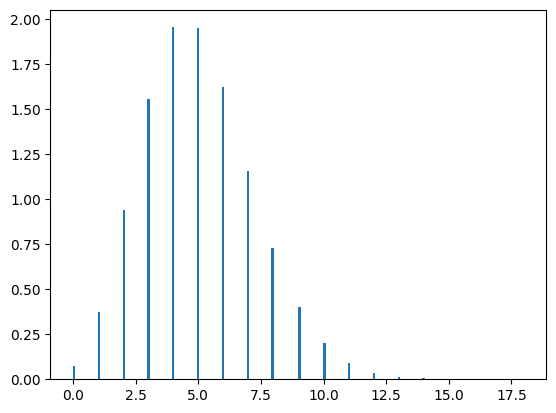

Le temps d'execution avec NUMPY d'une loi POISSON pour 1000000 itérations est de 6.60626482963562 secondes


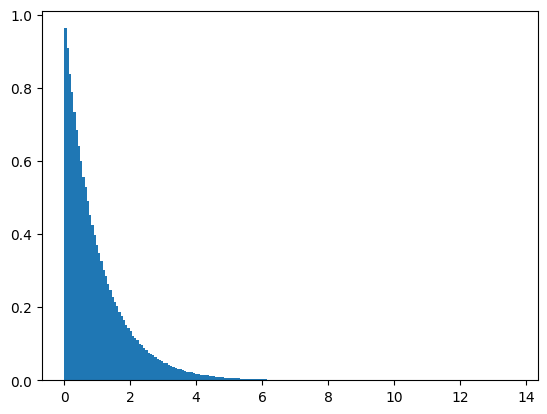

Le temps d'execution avec NUMPY d'une loi EXPONENTIELLE pour 1000000 itérations est de 4.213326930999756 secondes


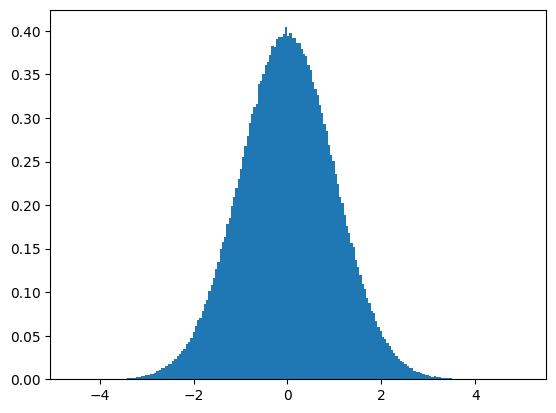

Le temps d'execution avec NUMPY d'une loi NORMALE pour 1000000 itérations est de 2.8286290168762207 secondes


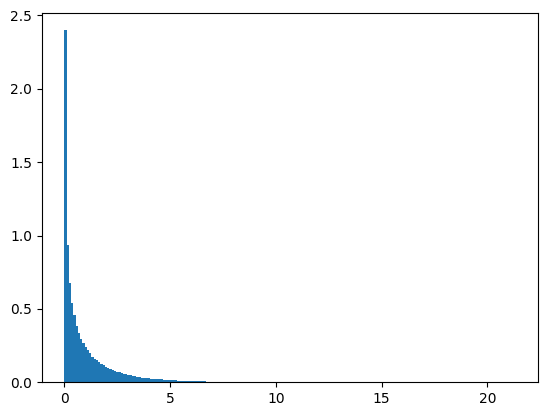

Le temps d'execution avec NUMPY d'une loi CHI2 pour 1000000 itérations est de 3.3977129459381104 secondes


In [57]:
p = 0.5
n = 1000000

#Generateur uniforme
G = np.random.uniform(0,1) #Tirer une proba uniforme 



#------------------------------------------------------------------------------------------------------------------------------------
# BERNOULLI
#------------------------------------------------------------------------------------------------------------------------------------

temps_debut = time.time()
for _ in range(n):
    np.random.binomial(1,p, size=None) 
temps_fin = time.time()

#Generation du diagramme
s = np.random.binomial(1, p, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi BERNOULLI pour", n , "itérations est de", temps_fin-temps_debut, "secondes")




#------------------------------------------------------------------------------------------------------------------------------------
# BINOMIALE
#------------------------------------------------------------------------------------------------------------------------------------

temps_debut = time.time()
for _ in range(n):
    np.random.binomial(100, p, size=None) #Tirer une proba uniforme
temps_fin = time.time()

s = np.random.binomial(100,p, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi BINOMIALE pour", n , "itérations est de", temps_fin-temps_debut, "secondes")




#------------------------------------------------------------------------------------------------------------------------------------
# POISSON
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.poisson(lam=5, size=None)
temps_fin = time.time()

s = np.random.poisson(lam=5, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi POISSON pour", n , "itérations est de", temps_fin-temps_debut, "secondes")




#------------------------------------------------------------------------------------------------------------------------------------
# EXPONENTIELLE
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.exponential(scale=1.0, size=None)
temps_fin = time.time()

s = np.random.exponential(scale=1.0, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi EXPONENTIELLE pour", n , "itérations est de", temps_fin-temps_debut, "secondes")




#------------------------------------------------------------------------------------------------------------------------------------
# NORMALE
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.normal(0, 1, size=None)
temps_fin = time.time()

s = np.random.normal(0, 1, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()

print("Le temps d'execution avec NUMPY d'une loi NORMALE pour", n , "itérations est de", temps_fin-temps_debut, "secondes")




#------------------------------------------------------------------------------------------------------------------------------------
# CHI2
#------------------------------------------------------------------------------------------------------------------------------------
temps_debut = time.time()
for _ in range(n):
    np.random.chisquare(1, size=None)
temps_fin = time.time()

s = np.random.chisquare(1, size=n)
count, bins, ignored = plt.hist(s, 200, density=True)
plt.show()
print("Le temps d'execution avec NUMPY d'une loi CHI2 pour", n , "itérations est de", temps_fin-temps_debut, "secondes")

# Avec pytorch

0.1464550495147705 secondes 


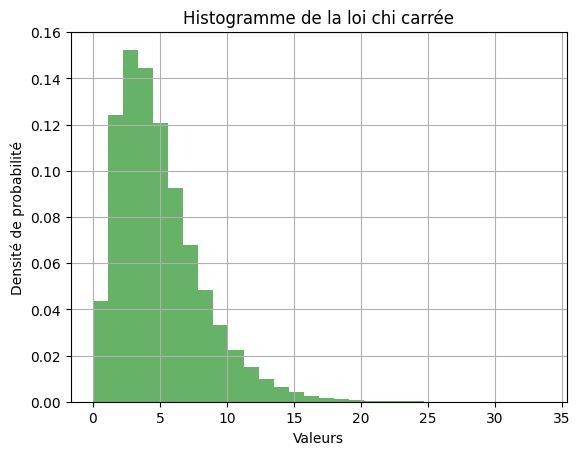

In [58]:
p = 0.5
n = 1000000



#------------------------------------------------------------------------------------------------------------------------------------
# BERNOULLI
#------------------------------------------------------------------------------------------------------------------------------------
def bernoulli(p):
    uniform = torch.rand((1,))
    return (uniform <= p).float()


#------------------------------------------------------------------------------------------------------------------------------------
# BERNOULLI TENSEUR
#------------------------------------------------------------------------------------------------------------------------------------
def bernoulliSamples(n, p, device='cpu'):
    temps_debut = time.time()
    samples = (torch.rand(n, device=device) <= p).float() #vectorisation hardware pour eviter une boucle for
    #on simule n unifrome en paralèlle
    temps_fin = time.time()
    print("Génération de",n, "loi de Bernoulli avec notre générateur en",temps_fin-temps_debut, "secondes avec p=", p, "sur", device)
    return samples
#from time import time au lieu de time.time 


#------------------------------------------------------------------------------------------------------------------------------------
# BINOMIALE AVEC BERNOUILLI
#------------------------------------------------------------------------------------------------------------------------------------
def binomialFromBernoulli(n, p, samples, device='cpu'):
    temps_debut = time.time()

    # Génère tous les échantillons de Bernoulli nécessaires en une seule opération.
    # La forme du tensor est (samples, n) pour obtenir `samples` échantillons de `n` essais chacun.
    bernoulli_samples = torch.rand(samples, n, device=device) <= p
    #comparer avec torch.where 
    
    # Somme les succès pour chaque ensemble de `n` essais pour obtenir des échantillons binomiaux.
    result = bernoulli_samples.sum(dim=1)
    temps_fin = time.time()

    print(f"Génération de {samples} échantillons de la distribution binomiale avec {n} essais par échantillon en {temps_fin-temps_debut} secondes avec p = {p} sur device = {device}")
    return result



#------------------------------------------------------------------------------------------------------------------------------------
# EXPONENTIELLE
#------------------------------------------------------------------------------------------------------------------------------------
def exponentielle(lam, samples, device='cpu'): #bien para
    # Génère un tensor de nombres aléatoires uniformément distribués entre 0 et 1
    temps_debut = time.time()

    uniform = torch.rand((samples,1), device=device)
    # Applique la transformation inverse de la fonction de répartition exponentielle
    result = -1.0 / lam * torch.log(1 - uniform)

    temps_fin = time.time()
    print(f"Génération de {samples} échantillons de la loi exponentielle (vectorized) avec lambda = {lam} en {temps_fin-temps_debut} secondes sur device = {device}")
    return result

#------------------------------------------------------------------------------------------------------------------------------------
# BOX MULLER
#------------------------------------------------------------------------------------------------------------------------------------
def boxMuller(n_samples, device='cpu'):
    """
    remplacer u1 u2 par u et torch.rand(n_sample, 2) puis appeler les bon elements jsp si dif de tmeps d'exec
    
    """
    temps_debut = time.time()  # Enregistrer le temps de début de l'exécution
    
    # Générer des nombres aléatoires uniformément distribués
    u1 = torch.rand((n_samples,1), device=device)
    u2 = torch.rand((n_samples,1), device=device)

    # Appliquer la méthode de Box-Muller pour générer des échantillons gaussiens
    z0 = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * torch.pi * u2)
    z1 = torch.sqrt(-2 * torch.log(u1)) * torch.sin(2 * torch.pi * u2)
    
    temps_fin = time.time()  # Enregistrer le temps de fin de l'exécution
    execution_time = temps_fin - temps_debut  # Calculer le temps d'exécution
    #print("Temps d'exécution de la fonction box_muller:", execution_time, "secondes")

    return z0, z1



#------------------------------------------------------------------------------------------------------------------------------------
# POISSON 
#------------------------------------------------------------------------------------------------------------------------------------

def poisson_pytorch(p, n, device='cpu'):
    results = torch.zeros(n, device=device)
    for i in range(n):
        k = 0
        u_product = 1.0
        while True:
            u = torch.rand(1, device=device).item()
            u_product *= u
            if u_product < torch.exp(torch.tensor(-p)).item():
                results[i] = k
                break
            k += 1
    return results
#------------------------------------------------------------------------------------------------------------------------------------
# CHI CARRÉ AVEC BOX MULLER
#------------------------------------------------------------------------------------------------------------------------------------
def chiSquareBoxMuller(samples, degrees_of_freedom, device='cpu'): 
    # Générer des échantillons gaussiens avec Box-Muller pour chaque degré de liberté
    chi2_samples = 0
    for _ in range(degrees_of_freedom):
        z0, _ = boxMuller(samples, device)
        chi2_samples += z0**2  # Somme des carrés pour simuler chi2

    return chi2_samples


#------------------------------------------------------------------------------------------------------------------------------------
# CHI CARRÉ DECENTREE AVEC STATS
#------------------------------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def loi_chi_carree(df, size):
 
    return chi2.rvs(df, size=size)

# Paramètres
df = 5  # Degrés de liberté
size = 1000000  # Taille de l'échantillon

tempsdebut=time.time()
# Générer des échantillons
echantillons = loi_chi_carree(df, size)
tempsfin=time.time()

print(f"{tempsfin-tempsdebut} secondes ")
   
# Afficher l'histogramme
plt.hist(echantillons, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme de la loi chi carrée')
plt.grid(True)
plt.show()





Génération de 1000000 loi de Bernoulli avec notre générateur en 0.27873802185058594 secondes avec p= 0.5 sur cpu


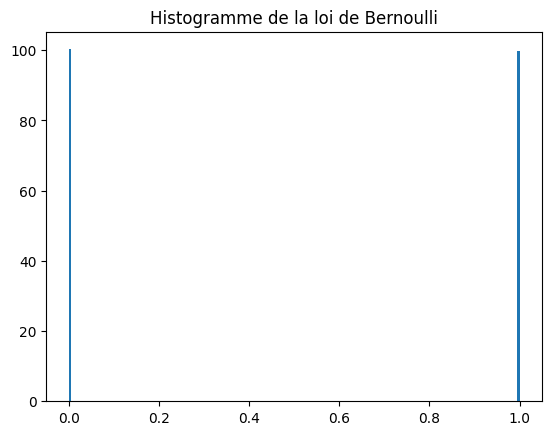

Génération de 1000000 échantillons de la distribution binomiale avec 100 essais par échantillon en 3.424696922302246 secondes avec p = 0.5 sur device = cpu


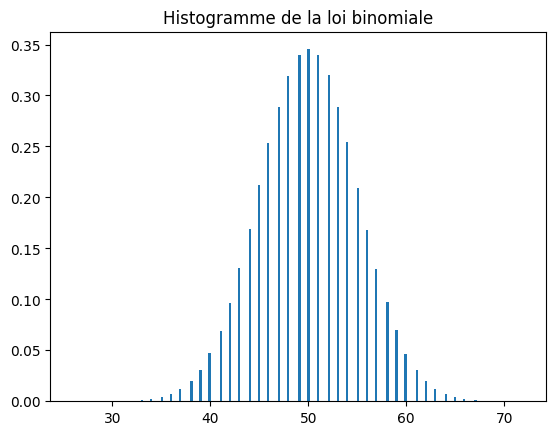

Génération de 1000000 échantillons de la loi exponentielle (vectorized) avec lambda = 1 en 0.11104917526245117 secondes sur device = cpu


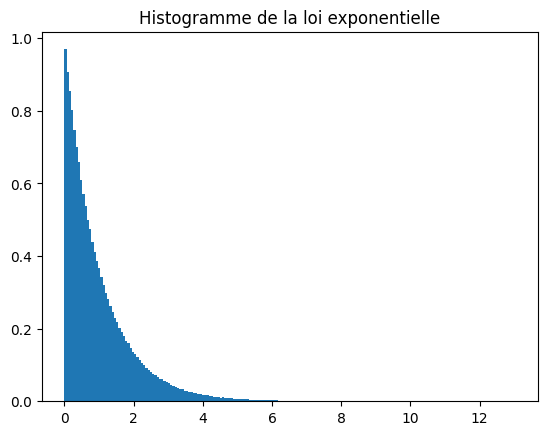

ValueError: supplied range of [-4.764153003692627, inf] is not finite

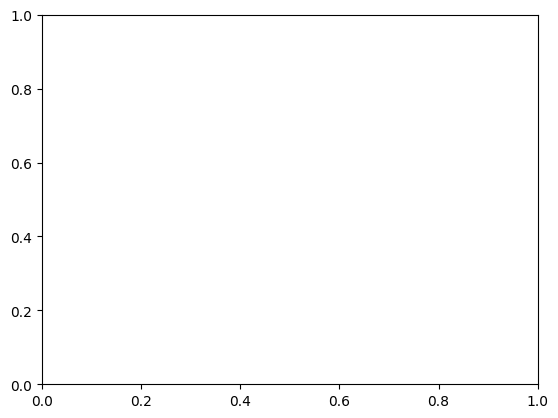

In [59]:

# Fonction pour afficher l'histogramme
def plot_histogram(data, title):
    plt.hist(data, bins=200, density=True)
    plt.title(title)
    plt.show()

# Fonction principale
def main():
    # Temps d'exécution et histogramme de la loi de Bernoulli
    bernoulli_samples = bernoulliSamples(n, p, device='cpu')
    plot_histogram(bernoulli_samples.cpu().numpy(), 'Histogramme de la loi de Bernoulli')

    # Temps d'exécution et histogramme de la loi binomiale
    binomial_samples = binomialFromBernoulli(100, p, n, device='cpu')
    plot_histogram(binomial_samples.cpu().numpy(), 'Histogramme de la loi binomiale')

    # Temps d'exécution et histogramme de la loi exponentielle
    exponential_samples = exponentielle(1, n, device='cpu')
    plot_histogram(exponential_samples.cpu().numpy(), 'Histogramme de la loi exponentielle')

    # Temps d'exécution et histogramme de la loi normale (Box-Muller)
    z0, _ = boxMuller(n, device='cpu')
    plot_histogram(z0.cpu().numpy(), 'Histogramme de la loi normale (Box-Muller)')

    # Temps d'exécution et histogramme de la loi du chi carré
    chi2_samples = chiSquareBoxMuller(n, 5, device='cpu')
    plot_histogram(chi2_samples.cpu().numpy(), 'Histogramme de la loi du chi carré')
   

    
    poisson_samples = poisson_pytorch(3, 100000)
    print(poisson_samples)
    plot_histogram(poisson_samples, 'hist poisson')
main()



# Nos propres générateurs


In [60]:
n = 100000
p = 0.5


#------------------------------------------------------------------------------------------------------------------------------------
# BERNOUILLI 
#------------------------------------------------------------------------------------------------------------------------------------
def bernoulli(p):
    G = np.random.uniform(0,1)
    if G <= p :
        return 1
    else:
        return 0

#------------------------------------------------------------------------------------------------------------------------------------
# BINOMIALE AVEC BERNOULLI  
#------------------------------------------------------------------------------------------------------------------------------------
def binomiale_with_bernoulli(n,p):
    res = 0
    for _ in range(n):
        res = res + bernoulli(p)
    return res

#------------------------------------------------------------------------------------------------------------------------------------
# BINOMIALE SANS BERNOUILLI  
#------------------------------------------------------------------------------------------------------------------------------------
def binomial_coefficient(n, k): #Calcul du coefficient binomial C(n,k)
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    k = min(k, n - k)  # Tirer parti de la symétrie
    coeff = 1
    for i in range(k):
        coeff *= (n - i)
        coeff //= (i + 1)
    return coeff

def binomial(n, p, nb_samples=1):
    # Generate nb_samples uniform random numbers
    uniform_samples = np.random.uniform(0, 1, size=nb_samples)
    binomial_variables = np.zeros(nb_samples, dtype=int)

    for k in range(nb_samples):
        cumulative_prob = 0
        for i in range(n + 1):
            prob = binomial_coefficient(n, i) * (p ** i) * ((1 - p) ** (n - i))
            cumulative_prob += prob
            if uniform_samples[k] <= cumulative_prob:
                binomial_variables[k] = i
                break

    return binomial_variables


#------------------------------------------------------------------------------------------------------------------------------------
# EXPONENTIELLE 
#------------------------------------------------------------------------------------------------------------------------------------
def exponential(lam):
    u = np.random.uniform(0, 1) 
    x = -1.0 / lam * np.log(1 - u) 
    return x



#------------------------------------------------------------------------------------------------------------------------------------
# POISSON  
#------------------------------------------------------------------------------------------------------------------------------------
def poisson_numpy(p):
    k = 0
    while True:
        u = np.random.rand()
        if u < np.exp(-p):
            return k
        else:
            u_product = u
            while u_product >= np.exp(-p):
                k += 1
                u_product *= np.random.rand()
            return k
        
def poisson_for(n, p):
    tab=[]
    for i in range(n):
        tab.append(poisson_numpy(p))
    return tab
#------------------------------------------------------------------------------------------------------------------------------------
# BOX MULLER  
#------------------------------------------------------------------------------------------------------------------------------------        
def box_muller(n_samples):
    start_time = time.time() 
    
    # Générer des nombres aléatoires uniformément distribués
    u1 = np.random.rand(n_samples)
    u2 = np.random.rand(n_samples)

    #Méthode de Box-Muller pour générer des échantillons gaussiens
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    end_time = time.time() 
    execution_time = end_time - start_time 
    print("Temps d'exécution de la fonction box_muller:", execution_time, "secondes")

    return z0, z1


#------------------------------------------------------------------------------------------------------------------------------------
#CHI CARRÉ
#------------------------------------------------------------------------------------------------------------------------------------        
def chi_square(n_samples, degrees_of_freedom):
    chi2_samples = 0
    for _ in range(degrees_of_freedom):
        z0, _ = box_muller(n_samples)
        chi2_samples += z0**2  # Somme des carrés pour simuler chi2

    return chi2_samples




#------------------------------------------------------------------------------------------------------------------------------------
#POISSON COMPOSEE
#------------------------------------------------------------------------------------------------------------------------------------        
def compound_poisson(lam, n):
    # Générer le nombre de composants de la loi de Poisson composée
    k = np.random.poisson(lam, size=n)
    
    # Générer les variables aléatoires pour chaque composant
    components = [np.random.poisson(lam, size=k_i) for k_i in k]
    
    # Concaténer tous les tableaux de la liste
    compound_sample = np.concatenate(components)
    
    return compound_sample



#------------------------------------------------------------------------------------------------------------------------------------
#CHI CARREE DECENTREE
#------------------------------------------------------------------------------------------------------------------------------------        
def chi_squared_decentered(df, loc, size=1):
    # Générer des échantillons à partir d'une distribution normale standard
    samples = np.random.randn(size)
    
    # Ajouter le décentrage
    samples += loc
    
    # Élever au carré les échantillons décentrés
    squared_samples = samples ** 2
    
    # Sommer les carrés des échantillons pour obtenir un échantillon de la loi du chi carré décentrée
    result = np.sum(squared_samples, axis=0)
    
    return result

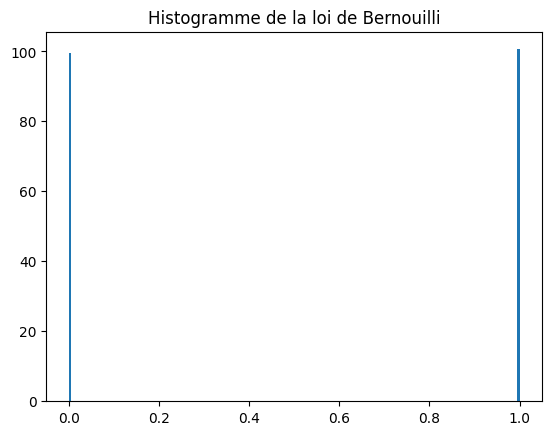

notre Generateur Bernoulli: 0.5169272422790527 secondes


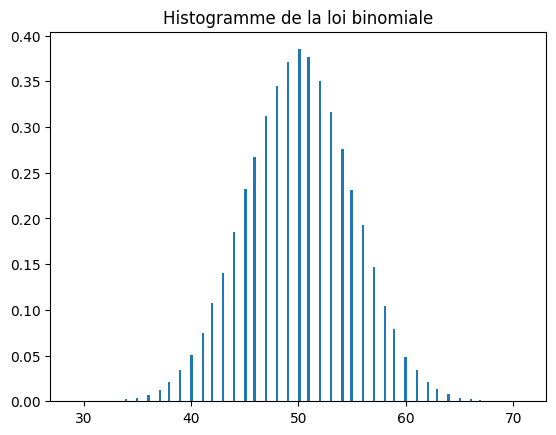

notre Generateur Binomiale avec Bernoulli: 47.772056102752686 secondes


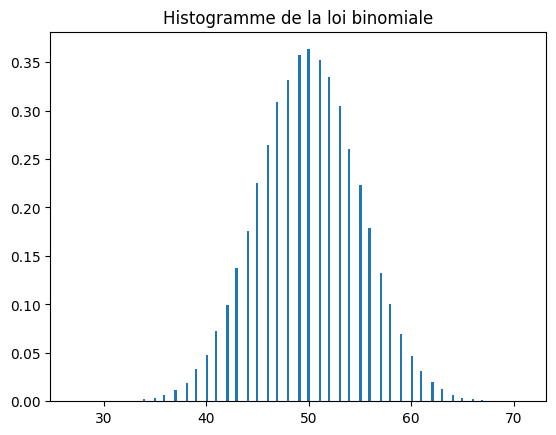

notre Generateur Binomiale sans Bernoulli: 43.16822099685669 secondes


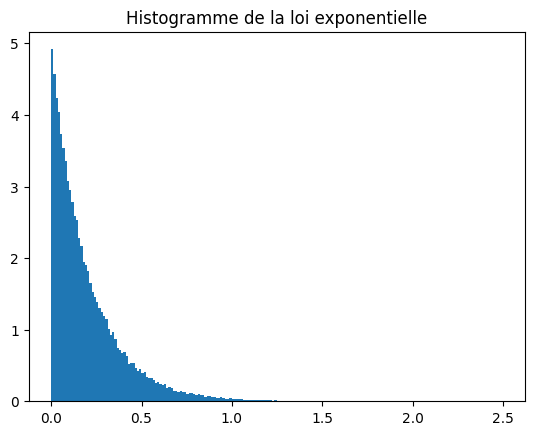

notre Generateur Exponnentielle: 0.6546938419342041 secondes


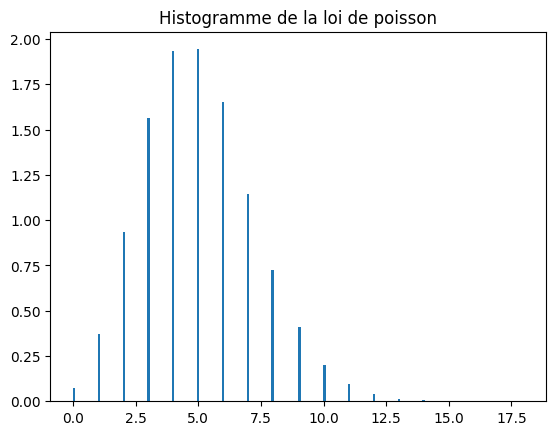

Temps d'exécution de la fonction box_muller: 0.040944814682006836 secondes


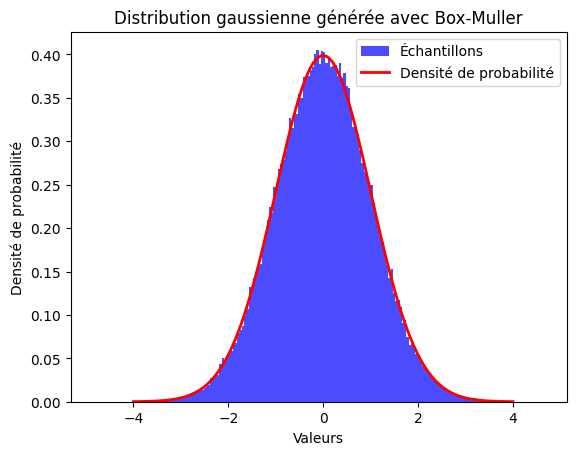

Temps d'exécution de la fonction box_muller: 0.011374950408935547 secondes
Temps d'exécution de la fonction box_muller: 0.01269388198852539 secondes


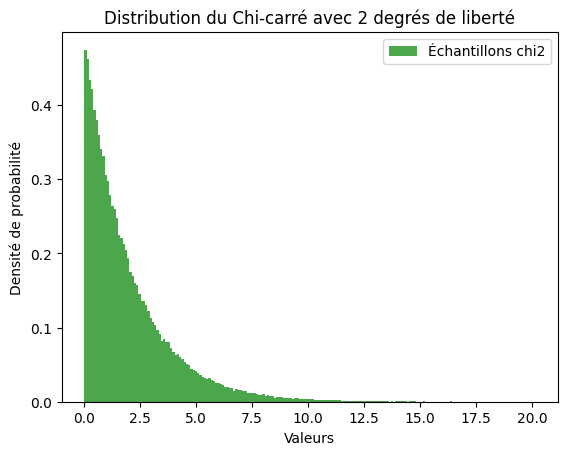

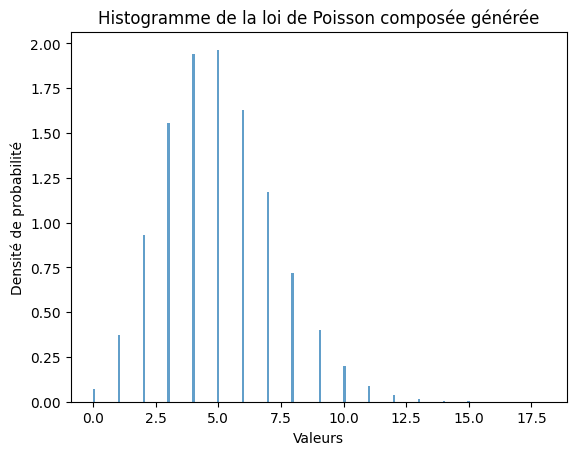

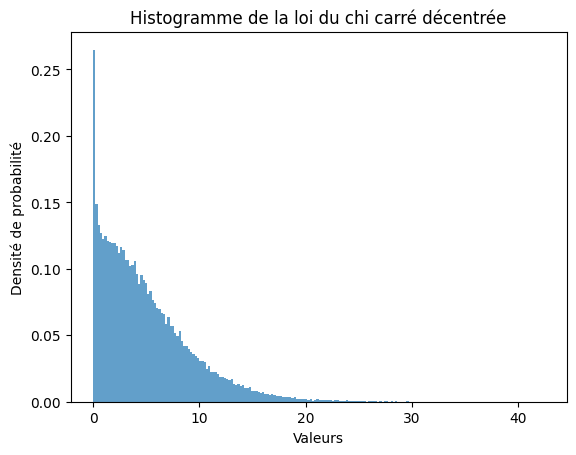

In [63]:
samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = bernoulli(p)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.title('Histogramme de la loi de Bernouilli')
plt.show()
print("notre Generateur Bernoulli:", temps_fin - temps_debut, "secondes")


#Binomiale avec Bernoulli-----------------------------------------
samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = binomiale_with_bernoulli(100,p)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.title('Histogramme de la loi binomiale')
plt.show()
print("notre Generateur Binomiale avec Bernoulli:", temps_fin - temps_debut, "secondes")


#Binomiale sans Bernoulli-----------------------------------------
samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = binomial(100,p, 1)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.title('Histogramme de la loi binomiale')
plt.show()
print("notre Generateur Binomiale sans Bernoulli:", temps_fin - temps_debut, "secondes")




#Exponentielle-----------------------------------------
samples = np.zeros(n)
temps_debut = time.time()
for i in range(n):
    samples[i] = exponential(5)
temps_fin = time.time()

plt.hist(samples, bins=200, density=True)
plt.title('Histogramme de la loi exponentielle')
plt.show()
print("notre Generateur Exponnentielle:", temps_fin - temps_debut, "secondes")



#Poisson-----------------------------------------
lam = 5  
plt.hist(poisson_for(n,lam), bins=200, density=True)
plt.title('Histogramme de la loi de poisson')
plt.show()


#Box Muller-----------------------------------------
z0, z1 = box_muller(n)

plt.hist(z0, bins=200, density=True, alpha=0.7, color='b', label='Échantillons')
x = np.linspace(-4, 4, 100) # Afficher la densité de probabilité théorique de la distribution gaussienne standard
pdf = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
plt.plot(x, pdf, 'r-', linewidth=2, label='Densité de probabilité')


plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Distribution gaussienne générée avec Box-Muller')
plt.legend()
plt.show()



#Chi carré-----------------------------------------
degrees_of_freedom = 2
corrected_chi2_samples = chi_square(n, degrees_of_freedom)

plt.hist(corrected_chi2_samples, bins=200, density=True, alpha=0.7, color='g', label='Échantillons chi2')
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Distribution du Chi-carré avec 2 degrés de liberté')
plt.legend()
plt.show()

#Poisson composée-----------------------------------------

samples = compound_poisson(5, n)

plt.hist(samples, bins=200, density=True, alpha=0.7, label='Échantillons poisson comp')
plt.title('Histogramme de la loi de Poisson composée générée')
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.show()


# Paramètres
df = 3  # Degré de liberté
loc = 2  # Décentrage

# Générer des échantillons de la loi du chi carré décentrée
samples_chidec=[]
temps_debut = time.time()
for _ in range(n):
    samples_chidec.append(chi_squared_decentered(df, loc))
temps_fin = time.time()

plt.show()
plt.hist(samples_chidec, bins=200, density=True, alpha=0.7)
plt.title('Histogramme de la loi du chi carré décentrée')
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour charger les échantillons à partir du fichier texte en tant qu'entiers
def load_samples(filename):
    with open(filename, "r") as fichier:
         return np.loadtxt(fichier)

        
# Chargement des échantillons depuis les fichiers texte
bernoulli_samples = load_samples("bernoulli_samples.txt")
samples_with_bernoulli = load_samples("binomial_with_bernoulli_samples.txt")
samples_without_bernoulli = load_samples("binomial_without_bernoulli_samples.txt")
exponential_samples = load_samples("exponential_samples.txt")
poisson_samples = load_samples("poisson_samples.txt")
chi2_samples = load_samples("chi2_samples.txt")

# Affichage de l'histogramme pour la distribution de Bernoulli
plt.hist(bernoulli_samples, bins=200, density=True, alpha=0.7)
plt.xlabel('Résultat de la distribution de Bernoulli')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme de la distribution de Bernoulli')
plt.show()

# Affichage de l'histogramme pour la distribution binomiale avec Bernoulli
plt.hist(samples_with_bernoulli, bins=200, density=True, alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme de la distribution binomiale avec Bernoulli')
plt.show()

# Affichage de l'histogramme pour la distribution binomiale sans Bernoulli
plt.hist(samples_without_bernoulli, bins=200, density=True, alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme de la distribution binomiale sans Bernoulli')
plt.show()

# Affichage de l'histogramme pour la loi exponentielle
plt.hist(exponential_samples, bins=200, density=True, alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme de la loi exponentielle')
plt.show()

# Affichage de l'histogramme pour la loi de Poisson
plt.hist(poisson_samples, bins=200, density=True, alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme de la loi de Poisson')
plt.show()



# Affichage de l'histogramme pour la distribution chi carré
plt.hist(chi2_samples, bins=200, density=True, alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme de la distribution chi carré')
plt.show()


